# Assignment Module 2: Product Classification

The goal of this assignment is to implement a neural network that classifies smartphone pictures of products found in grocery stores. The assignment will be divided into two parts: first, you will be asked to implement from scratch your own neural network for image classification; then, you will fine-tune a pretrained network provided by PyTorch.


## Preliminaries: the dataset

The dataset you will be using contains natural images of products taken with a smartphone camera in different grocery stores:

<p align="center">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Granny-Smith.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Pink-Lady.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Lemon.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Banana.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Vine-Tomato.jpg" width="150">
</p>
<p align="center">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Yellow-Onion.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Green-Bell-Pepper.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Arla-Standard-Milk.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Oatly-Natural-Oatghurt.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Alpro-Fresh-Soy-Milk.jpg" width="150">
</p>

The products belong to the following 43 classes:
```
0.  Apple
1.  Avocado
2.  Banana
3.  Kiwi
4.  Lemon
5.  Lime
6.  Mango
7.  Melon
8.  Nectarine
9.  Orange
10. Papaya
11. Passion-Fruit
12. Peach
13. Pear
14. Pineapple
15. Plum
16. Pomegranate
17. Red-Grapefruit
18. Satsumas
19. Juice
20. Milk
21. Oatghurt
22. Oat-Milk
23. Sour-Cream
24. Sour-Milk
25. Soyghurt
26. Soy-Milk
27. Yoghurt
28. Asparagus
29. Aubergine
30. Cabbage
31. Carrots
32. Cucumber
33. Garlic
34. Ginger
35. Leek
36. Mushroom
37. Onion
38. Pepper
39. Potato
40. Red-Beet
41. Tomato
42. Zucchini
```

The dataset is split into training (`train`), validation (`val`), and test (`test`) set.

The following code cells download the dataset and define a `torch.utils.data.Dataset` class to access it. This `Dataset` class will be the starting point of your assignment: use it in your own code and build everything else around it.

In [ ]:
!git clone https://github.com/marcusklasson/GroceryStoreDataset.git

Cloning into 'GroceryStoreDataset'...
remote: Enumerating objects: 6559, done.
remote: Counting objects: 100% (266/266), done.
remote: Compressing objects: 100% (231/231), done.
remote: Total 6559 (delta 45), reused 35 (delta 35), pack-reused 6293 (from 1)
Receiving objects: 100% (6559/6559), 116.26 MiB | 15.78 MiB/s, done.
Resolving deltas: 100% (275/275), done.
Updating files: 100% (5717/5717), done.


In [ ]:
from pathlib import Path
from PIL import Image
from torch import Tensor
from torch.utils.data import Dataset
from typing import List, Tuple

In [ ]:
class GroceryStoreDataset(Dataset):

    def __init__(self, split: str, transform=None, verbose = False) -> None:
        super().__init__()

        self.root = Path("GroceryStoreDataset/dataset")
        self.split = split
        self.paths, self.labels = self.read_file()

        self.transform = transform
        self.verbose = verbose

    def __len__(self) -> int:                               # method returns int value
        return len(self.labels)

    def __getitem__(self, idx) -> Tuple[Tensor, int]:       # returns img and label
        img = Image.open(self.root / self.paths[idx])
        label = self.labels[idx]

        if self.transform:                                  # if transform is not None
            if self.verbose:
                print('Image original size:', np.array(img).shape)
            img = self.transform(img)

        return img, label

    def read_file(self) -> Tuple[List[str], List[int]]:
        paths = []
        labels = []

        with open(self.root / f"{self.split}.txt") as f:
            for line in f:
                # path, fine-grained class, coarse-grained class
                path, _, label = line.replace("\n", "").split(", ")
                paths.append(path), labels.append(int(label))

        return paths, labels

    def get_num_classes(self) -> int:
        return max(self.labels) + 1

### Part 1: design your own network

Your goal is to implement a convolutional neural network for image classification and train it on `GroceryStoreDataset`. You should consider yourselves satisfied once you obtain a classification accuracy on the **validation** split of **around 60%**. You are free to achieve that however you want, except for a few rules you must follow:

- You **cannot** simply instantiate an off-the-self PyTorch network. Instead, you must construct your network as a composition of existing PyTorch layers. In more concrete terms, you can use e.g. `torch.nn.Linear`, but you **cannot** use e.g. `torchvision.models.alexnet`.

- Justify every *design choice* you make. Design choices include network architecture, training hyperparameters, and, possibly, dataset preprocessing steps. You can either (i) start from the simplest convolutional network you can think of and add complexity one step at a time, while showing how each step gets you closer to the target ~60%, or (ii) start from a model that is already able to achieve the desired accuracy and show how, by removing some of its components, its performance drops (i.e. an *ablation study*). You can *show* your results/improvements however you want: training plots, console-printed values or tables, or whatever else your heart desires: the clearer, the better.

Don't be too concerned with your network performance: the ~60% is just to give you an idea of when to stop. Keep in mind that a thoroughly justified model with lower accuracy will be rewarded **more** points than a poorly experimentally validated model with higher accuracy.

## Part 2: fine-tune an existing network

Your goal is to fine-tune a pretrained **ResNet-18** model on `GroceryStoreDataset`. Use the implementation provided by PyTorch, do not implement it yourselves! (i.e. exactly what you **could not** do in the first part of the assignment). Specifically, you must use the PyTorch ResNet-18 model pretrained on ImageNet-1K (V1). Divide your fine-tuning into two parts:

1. First, fine-tune the Resnet-18 with the same training hyperparameters you used for your best model in the first part of the assignment.
1. Then, tweak the training hyperparameters in order to increase the accuracy on the validation split of `GroceryStoreDataset`. Justify your choices by analyzing the training plots and/or citing sources that guided you in your decisions (papers, blog posts, YouTube videos, or whatever else you find enlightening). You should consider yourselves satisfied once you obtain a classification accuracy on the **validation** split **between 80 and 90%**.

# __PART 1__

### Setting seed for reproducability
Allowing cudnn.benchmark for faster runtime

In [ ]:
import torch
print("Using torch", torch.__version__)

import numpy as np
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms as T
from torch.optim import Adam


def fix_random(seed: int) -> None:
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

    #torch.backends.cudnn.benchmark = False
    #torch.backends.cudnn.deterministic = True

fix_random(42)

Using torch 2.4.1+cu121


### Inspecting the Dataset: dislplaying random samples

Total Number of Classes: 43 



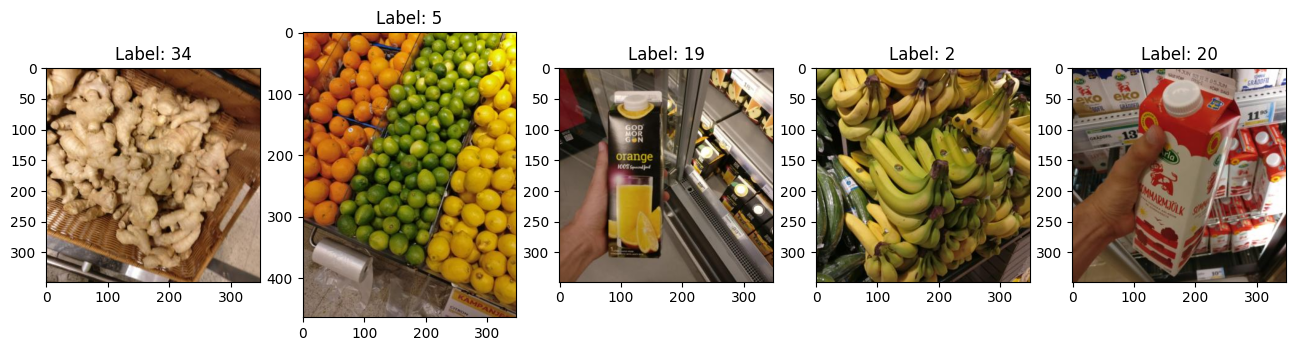

In [ ]:
tsfms = T.Compose([T.ToTensor()])
# getting path and labels of the datasets and applying the transforms
sample_ds = GroceryStoreDataset("train", transform=tsfms, verbose=False)
print('Total Number of Classes:',sample_ds.get_num_classes(),'\n')

plt.figure(figsize=(16, 24))
for i in range(5):
    index = np.random.randint(0, len(sample_ds.paths))
    path, label = sample_ds.paths[index], sample_ds.labels[index]
    #print('Training element image path:', path)

    plt.subplot(1, 5, i + 1)
    plt.title(f"Label: {label}")
    # Displaying the image (3, 348, 348) -> (348, 348, 3)
    plt.imshow(sample_ds.__getitem__(index)[0].permute(1, 2, 0))

plt.show()

### Learning Rate Scheduler
Using a One Cycle **Learning Rate Scheduler** for trainig, with a linear warmup phase to target lr, followed by linear decay for further optimization. The first part enables the classifier to first get out of initial initialization of weights, than rumps up to a high lr in order to get to a wider minima and eanbling faster convergence. Finally the lr linearly decreses to get to a lower optima.

In [ ]:
from torch.optim import Optimizer
from torch.optim.lr_scheduler import _LRScheduler
from torch.optim.lr_scheduler import OneCycleLR, ReduceLROnPlateau

class WarmupScheduler(_LRScheduler):
    def __init__(self, optimizer: Optimizer, warmup_steps: int, total_steps: int, last_epoch: int = -1):
        self.warmup_steps = warmup_steps
        self.total_steps = total_steps

        super(WarmupScheduler, self).__init__(optimizer, last_epoch)


    def get_lr(self):
        if self.last_epoch < self.warmup_steps:
            # Linear warmup phase
            return [base_lr * (self.last_epoch + 1) / self.warmup_steps for base_lr in self.base_lrs]
        else:
            # Decay phase
            return [base_lr * (self.total_steps - self.last_epoch) / (self.total_steps - self.warmup_steps) for base_lr in self.base_lrs]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm.notebook import tqdm

# import the drive module for colab
from google.colab import drive
drive.mount('/content/drive')

# Check if GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Mounted at /content/drive
Is the GPU available? True


### Training Loop
The training loop incorporates the Early Stopping with weight restore and learning rate update through scheduler.

In [ ]:
def ncorrect(scores, y):
    y_pred = torch.argmax(scores, -1)
    return (y_pred == y).sum()

def train_loop(model, train_dl, val_dl, criterion, opt, epochs, scheduler=None, patience=None, verbose=False):
    best_val_loss = float('inf')
    best_val_acc = 0.0
    patience_counter = 0              # Counter to track how long since validation loss improvement
    best_epoch = -1
    best_weights = model.state_dict() # Initialize to initial weights

    # store for return
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in tqdm(range(epochs)):
        model.train()                 # Set the model to training mode

        train_loss = 0.0
        train_acc = 0.0
        train_samples=0               # num of samples

        for train_data in train_dl:
            imgs = train_data[0].to(device)
            labels = train_data[1].to(device)

            output_scores = model(imgs)
            loss = criterion(output_scores, labels)

            train_loss += loss.item()*imgs.shape[0]               # mul by batch size
            train_samples += imgs.shape[0]                        # update seen samples
            train_acc += ncorrect(output_scores, labels).item()   # item converts single el pytorch tensor to standard python num

            opt.zero_grad()         # Reset gradients making sure they are not accumulated from previous batches
            loss.backward()         # Backpropagation
            opt.step()              # Update weights
            if scheduler != None:
              scheduler.step()        # Update learning rate

        train_loss /= train_samples
        train_acc /= train_samples

        # after each epoch, validate the model on validation set
        val_loss, val_acc = validate(model, val_dl, criterion)

        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        if verbose and ((epoch+1)%5==0 or epoch==0 or epoch==epochs ):
            print(f'Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.4f} - Training Acc: {train_acc:.4f}, Validation Loss: {val_loss:.4f} - Validation Acc: {val_acc:.4f}')

        # check for improvement in validation loss
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_params = model.state_dict()
            torch.save(best_params, "/content/drive/MyDrive/AssignmentsIPCV/Weights/weights.pth")       # saving the best weights
            best_epoch = epoch
            if patience != None:
              patience_counter = 0      # reset counter
        else:
            if patience != None:
              patience_counter += 1

        #scheduler.step(val_loss)       # for ReduceLROnPlateau

        # early stopping with weight restore
        # if patience is None then no early stopping
        if patience != None and patience_counter >= patience:
            if verbose:
                print(f'Early stopping at epoch {epoch+1}')
            model.load_state_dict(best_weights)
            break

    if verbose:
        print()
        print(f"Best validation accuracy: {best_val_acc:.4f} at epoch {best_epoch+1}")

    # returns losses and accuracies for plotting
    return best_val_acc, best_weights, best_epoch, train_losses, val_losses, train_accuracies, val_accuracies

def validate(model, val_dl, criterion):
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    val_acc = 0.0
    val_samples = 0
    with torch.no_grad():  # no need to calculate gradients for validation
        for val_data in val_dl:
            imgs = val_data[0].to(device)
            labels = val_data[1].to(device)
            val_scores = model(imgs)
            loss = criterion(val_scores, labels)
            val_loss += loss.item() * imgs.shape[0]
            val_samples += imgs.shape[0]
            val_acc += ncorrect(val_scores, labels).item()

    val_loss /= val_samples
    val_acc /= val_samples

    return val_loss, val_acc

### Evaluation Function
Evaluation function for plotting the confusion matrix calculated on test set, together with training and validation losses and accuracies.

In [ ]:
import pandas as pd
import seaborn as sn

# plotting of confusion matrix is set to *false* by default
def evaluate(model, test_dl, n_classes, train_losses, val_losses, train_accuracies, val_accuracies, plot_confusion_matrix=False):
    model.eval()
    test_acc = 0.0
    test_samples = 0
    confusion_matrix = torch.zeros(n_classes, n_classes, dtype=torch.int)
    with torch.no_grad():
        for test_data in test_dl:
            imgs = test_data[0].to(device)
            labels = test_data[1].to(device)

            test_scores = model(imgs)
            preds = torch.argmax(test_scores, -1)
            for lbl, pred in zip(labels.view(-1), preds.view(-1)):  # view(-1) flattens the tensor to 1D
                confusion_matrix[lbl.int(), pred.int()] += 1

    test_acc = (torch.diagonal(confusion_matrix).sum() / confusion_matrix.sum()).item()
    print()
    print(f'Accuracy on Test Set: {test_acc:.4f}')

    # Plotting the confusion matrix
    if plot_confusion_matrix:
      conf_mtrx_df = pd.DataFrame(confusion_matrix)
      plt.figure(figsize=(14, 14))
      sn.heatmap(conf_mtrx_df, annot=True, fmt="d");
      plt.show()

    plt.figure(figsize=(14, 6))
    # Plotting the training and validation losses
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Plotting the training and validation accuracies
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()


    plt.show()


    return test_acc

### Transformations to Data
**Data Augmentation**: random cropping and random horizontal flips on training samples.

In [ ]:
from torch.utils.data import DataLoader

train_tsfms = T.Compose([T.RandomCrop(224),                     # randomcrop is used for data augmentation
                         T.RandomHorizontalFlip(),              # randomhorizontalflip is used for data augmentation
                         T.ToTensor()])
test_tsfms = T.Compose([T.CenterCrop(224),
                    T.ToTensor()])

train_ds = GroceryStoreDataset("train", transform=train_tsfms, verbose=False)
test_ds = GroceryStoreDataset("test", transform=test_tsfms, verbose=False)
val_ds = GroceryStoreDataset("val", transform=test_tsfms, verbose=False)

train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)    # image can appear multiple times with different transformations in different epochs
val_dl = DataLoader(val_ds, batch_size=32, shuffle=False)
test_dl = DataLoader(test_ds, batch_size=32, shuffle=False)

### Model Definition Methodology Description
**Removed Model**: first I trained a model with 20M parameters that has achieved an accuracy score on validation set of 0.7196. The model had taken inspiration from VGG repetition of stages and Inception style Global Average Pooling Classifier head. In fact the spatial dimensions were **averaged out** before fed into the FC layer. BatchNorm had been also added to regularize the network.
This model has than been **discarded** in order to follow a **better approach** for model design. Step by step, complexity to the model was added, and design choices were made, like the addition of **skip connections**, in order to arrive achieving a validation accuracy score of 0.7365 with **half** the number of parameters of the model previously descripited and with more reproducible training.

Also a **consideration** on the training images displayed has been done: the objects to classify are usually a little part of the image captured. They other are present in a stack of products or usually occupy the center of the image. This means that a large receptive field capturing wider pixel areas _might_ not be needed.

### The first attempt was to streamline the network to the minimum.

In [ ]:
class ClassifierOneStage(nn.Module):          # subclassing nn.Module
    def __init__(self, input_dim, n_classes, dropout=0.15):
        super().__init__()

        self.features_extractor = nn.Sequential(
            # Block 1
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )


        # Global Average Pooling classifier averaging out Spatial Dimensions taking inspiration from Inception V1
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),   # Averages height and width dimensions
            nn.Flatten(),
            nn.Linear(64, n_classes)       # Outputs the class scores
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features_extractor(x)    # Pass input through the feature extractor
        x = self.classifier(x)
        return x

In [ ]:
print('Steps in one epoch:',len(train_ds)/32)

Steps in one epoch: 82.5


In [ ]:
N_CLASSES = train_ds.get_num_classes()
INPUT_DIM = train_ds.__getitem__(0)[0].shape[0]
model_one = ClassifierOneStage(
    INPUT_DIM,
    N_CLASSES
).to(device)


# using pytorch OneCycleLR
EPOCHS = 50
PATIENCE = None                                                                         # no early stopping
OPTIMIZER = torch.optim.Adam(model_one.parameters(), lr=0.01)                           # trying higher lr since using the learning rate scheduler
SCHEDULER = OneCycleLR(OPTIMIZER, max_lr=0.01, total_steps=4150, final_div_factor=10000) # from 1e-2 to 1e-6
CRITERION = nn.CrossEntropyLoss(label_smoothing = 0.1)                                  # label smoothing -> correct will be 0.9

results = train_loop(
    model_one,
    train_dl=train_dl,
    val_dl=val_dl,
    criterion=CRITERION,  # loss
    opt=OPTIMIZER,
    scheduler=SCHEDULER,
    epochs=EPOCHS,
    patience=PATIENCE,
    verbose=True          # print progress
)

best_val_acc, best_weights, best_epoch, train_losses, val_losses, train_accuracies, val_accuracies = results

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50, Training Loss: 3.3710 - Training Acc: 0.1663, Validation Loss: 3.2642 - Validation Acc: 0.1757
Epoch 2/50, Training Loss: 3.0041 - Training Acc: 0.2712, Validation Loss: 3.0430 - Validation Acc: 0.2297
Epoch 3/50, Training Loss: 2.7994 - Training Acc: 0.3258, Validation Loss: 2.9082 - Validation Acc: 0.2331
Epoch 4/50, Training Loss: 2.6234 - Training Acc: 0.3674, Validation Loss: 2.7337 - Validation Acc: 0.2939
Epoch 5/50, Training Loss: 2.5035 - Training Acc: 0.3864, Validation Loss: 2.5335 - Validation Acc: 0.3716
Epoch 6/50, Training Loss: 2.4161 - Training Acc: 0.3970, Validation Loss: 2.8886 - Validation Acc: 0.2264
Epoch 7/50, Training Loss: 2.3380 - Training Acc: 0.4254, Validation Loss: 2.6214 - Validation Acc: 0.3615
Epoch 8/50, Training Loss: 2.2752 - Training Acc: 0.4318, Validation Loss: 2.5728 - Validation Acc: 0.3919
Epoch 9/50, Training Loss: 2.2222 - Training Acc: 0.4568, Validation Loss: 2.6481 - Validation Acc: 0.2770
Epoch 10/50, Training Loss: 2.1216 - 

Accuracy on Test Set: 0.6133


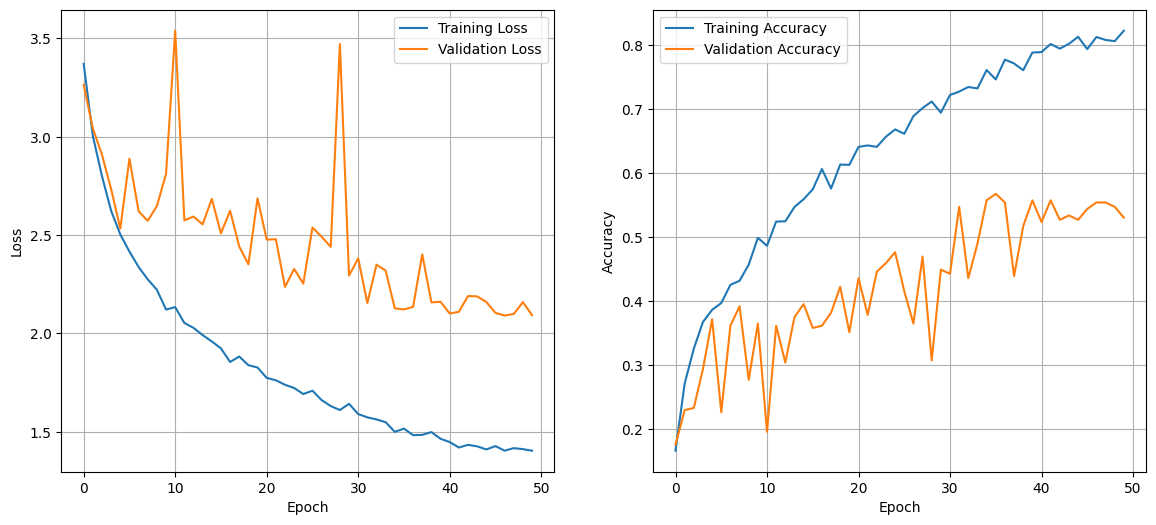

In [ ]:
# Evaluate Model
test_acc = evaluate(model=model_one, test_dl=test_dl, n_classes=N_CLASSES, train_losses=train_losses, val_losses=val_losses, train_accuracies=train_accuracies, val_accuracies=val_accuracies)

### The model reaches 0.61 accuracy on the test set but doesn't reach the 0.6 accuracy on the validation set. The model has very few parameters as it can be seen below.

In [ ]:
total_params = sum(p.numel() for p in model_one.parameters() if p.requires_grad)
print(f"Total trainable parameters of the model with one stage: {total_params}")
print()

Total trainable parameters of the model with one stage: 41771



### Classifier with two stages

In [ ]:
class ClassifierTwoStages(nn.Module):          # subclassing nn.Module
    def __init__(self, input_dim, n_classes, dropout=0.15):
        super().__init__()

        self.features_extractor = nn.Sequential(
            # Block 1
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 2
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        # Fully connected classifier averaging out dimensions
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),   # Averages height and width dimensions
            nn.Flatten(),
            nn.Linear(128, n_classes)       # Outputs the class scores
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features_extractor(x)    # Pass input through the feature extractor
        x = self.classifier(x)
        return x


In [ ]:
N_CLASSES = train_ds.get_num_classes()
INPUT_DIM = train_ds.__getitem__(0)[0].shape[0]
model_two = ClassifierTwoStages(
    INPUT_DIM,
    N_CLASSES
).to(device)

total_params = sum(p.numel() for p in model_two.parameters() if p.requires_grad)
print(f"Total trainable parameters of the model with two stages: {total_params}")
print()


# using pytorch OneCycleLR
EPOCHS = 50
PATIENCE = None                                                                         # no early stopping
OPTIMIZER = torch.optim.Adam(model_two.parameters(), lr=0.01)                           # trying higher lr since using the learning rate scheduler
SCHEDULER = OneCycleLR(OPTIMIZER, max_lr=0.01, total_steps=4150, final_div_factor=1000) # from 1e-2 to 1e-5
CRITERION = nn.CrossEntropyLoss(label_smoothing = 0.1)                                  # label smoothing -> correct will be 0.9

results = train_loop(
    model_two,
    train_dl=train_dl,
    val_dl=val_dl,
    criterion=CRITERION,  # loss
    opt=OPTIMIZER,
    scheduler=SCHEDULER,
    epochs=EPOCHS,
    patience=PATIENCE,
    verbose=True          # print progress
)

best_val_acc, best_weights, best_epoch, train_losses, val_losses, train_accuracies, val_accuracies = results

Total trainable parameters of the model with two stages: 266475



  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50, Training Loss: 3.0359 - Training Acc: 0.2716, Validation Loss: 2.9112 - Validation Acc: 0.2635
Epoch 4/50, Training Loss: 2.2401 - Training Acc: 0.4530, Validation Loss: 2.8874 - Validation Acc: 0.2635
Epoch 7/50, Training Loss: 1.9904 - Training Acc: 0.5364, Validation Loss: 3.5078 - Validation Acc: 0.2027
Epoch 10/50, Training Loss: 1.8167 - Training Acc: 0.6042, Validation Loss: 2.7360 - Validation Acc: 0.3615
Epoch 13/50, Training Loss: 1.5827 - Training Acc: 0.7027, Validation Loss: 5.3304 - Validation Acc: 0.2534
Epoch 16/50, Training Loss: 1.4611 - Training Acc: 0.7636, Validation Loss: 2.4550 - Validation Acc: 0.4527
Epoch 19/50, Training Loss: 1.3577 - Training Acc: 0.8144, Validation Loss: 2.3872 - Validation Acc: 0.5135
Epoch 22/50, Training Loss: 1.2840 - Training Acc: 0.8273, Validation Loss: 3.1699 - Validation Acc: 0.3885
Epoch 25/50, Training Loss: 1.2283 - Training Acc: 0.8621, Validation Loss: 2.5035 - Validation Acc: 0.4899
Epoch 28/50, Training Loss: 1.1

NameError: name 'model_one' is not defined

Accuracy on Test Set: 0.7392


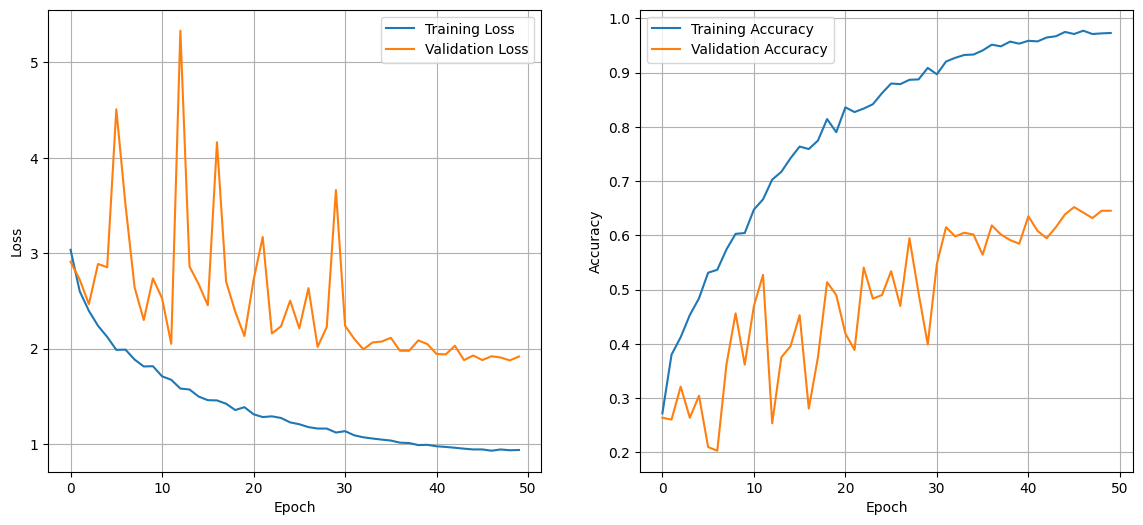

In [ ]:
# Evaluate Model
best_val_acc, best_weights, best_epoch, train_losses, val_losses, train_accuracies, val_accuracies = results
test_acc = evaluate(model=model_two, test_dl=test_dl, n_classes=N_CLASSES, train_losses=train_losses, val_losses=val_losses, train_accuracies=train_accuracies, val_accuracies=val_accuracies)

### The model achieves a validation accuracy score of 0.65 and 0.7392 on Test Set. From the loss graph we can also see how the loss **steadily decreases** reaching lower optima with the decreasing of the LR.
### The Network also is still very small with only around 260k parameter

In [ ]:
class ClassifierThreeStages(nn.Module):          # subclassing nn.Module
    def __init__(self, input_dim, n_classes, dropout=0.15):
        super().__init__()

        #Repetition of stages taking inspiration from VGG.
        #Adding BatchNorm for faster convergence and averaging out spatial dimensions.
        self.features_extractor = nn.Sequential(
            # Block 1
            nn.Conv2d(3, 64, kernel_size=3, padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 2
            nn.Conv2d(64, 128, kernel_size=3, padding=0),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=0),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 3
            nn.Conv2d(128, 256, kernel_size=3, padding=0),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=0),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=0),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True)
        )

        # Global Average Pooling classifier averaging out Spatial Dimensions taking inspiration from Inception V1
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),   # Averages height and width dimensions
            nn.Flatten(),
            nn.Linear(256, n_classes)       # Outputs the class scores
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features_extractor(x)    # Pass input through the feature extractor
        x = self.classifier(x)
        return x


Total trainable parameters of the model with three stages: 1748843



  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50, Training Loss: 2.7847 - Training Acc: 0.3352, Validation Loss: 2.7209 - Validation Acc: 0.2736
Epoch 4/50, Training Loss: 2.1136 - Training Acc: 0.4720, Validation Loss: 2.4791 - Validation Acc: 0.3514
Epoch 7/50, Training Loss: 1.9732 - Training Acc: 0.5254, Validation Loss: 2.7680 - Validation Acc: 0.3547
Epoch 10/50, Training Loss: 1.8468 - Training Acc: 0.5902, Validation Loss: 2.3310 - Validation Acc: 0.4459
Epoch 13/50, Training Loss: 1.6756 - Training Acc: 0.6481, Validation Loss: 2.7364 - Validation Acc: 0.3446
Epoch 16/50, Training Loss: 1.5455 - Training Acc: 0.7125, Validation Loss: 2.3160 - Validation Acc: 0.4628
Epoch 19/50, Training Loss: 1.4349 - Training Acc: 0.7572, Validation Loss: 2.3981 - Validation Acc: 0.5135
Epoch 22/50, Training Loss: 1.3124 - Training Acc: 0.8098, Validation Loss: 2.5555 - Validation Acc: 0.4730
Epoch 25/50, Training Loss: 1.2246 - Training Acc: 0.8545, Validation Loss: 2.2896 - Validation Acc: 0.5101
Epoch 28/50, Training Loss: 1.1

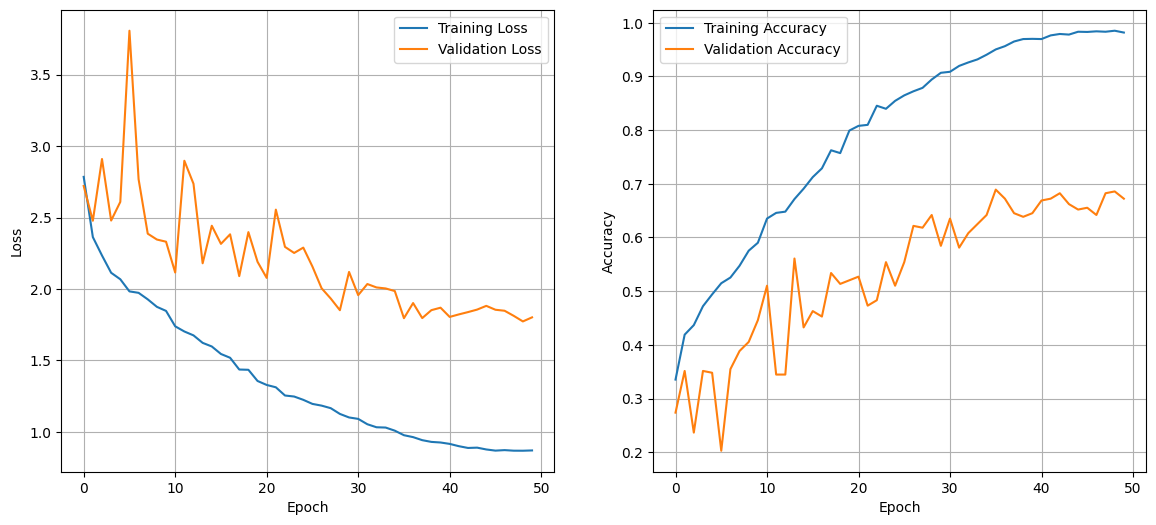

In [ ]:
N_CLASSES = train_ds.get_num_classes()
INPUT_DIM = train_ds.__getitem__(0)[0].shape[0]
model_three = ClassifierThreeStages(
    INPUT_DIM,
    N_CLASSES
).to(device)

total_params = sum(p.numel() for p in model_three.parameters() if p.requires_grad)
print(f"Total trainable parameters of the model with three stages: {total_params}")
print()


# using pytorch OneCycleLR
EPOCHS = 50
PATIENCE = None                                                                             # no early stopping
OPTIMIZER = torch.optim.Adam(model_three.parameters(), lr=0.01)                             # trying higher lr since using the learning rate scheduler
SCHEDULER = OneCycleLR(OPTIMIZER, max_lr=0.01, total_steps=4150, final_div_factor=10000)    # from 1e-2 to 1e-6
CRITERION = nn.CrossEntropyLoss(label_smoothing = 0.1)                                      # label smoothing -> correct will be 0.9

results = train_loop(
    model_three,
    train_dl=train_dl,
    val_dl=val_dl,
    criterion=CRITERION,  # loss
    opt=OPTIMIZER,
    scheduler=SCHEDULER,
    epochs=EPOCHS,
    patience=PATIENCE,
    verbose=True          # print progress
)

best_val_acc, best_weights, best_epoch, train_losses, val_losses, train_accuracies, val_accuracies = results

# Evaluate Model
test_acc = evaluate(model=model_three, test_dl=test_dl, n_classes=N_CLASSES, train_losses=train_losses, val_losses=val_losses, train_accuracies=train_accuracies, val_accuracies=val_accuracies)

### The model is achieving a good performance of 0.6892 on the validation set.

In [ ]:
class Classifier11(nn.Module):          # subclassing nn.Module
    def __init__(self, input_dim, n_classes, dropout=0.15):
        super().__init__()

        #Repetition of stages taking inspiration from VGG.
        #Adding BatchNorm for faster convergence and averaging out spatial dimensions.
        self.features_extractor = nn.Sequential(
            # Block 1
            nn.Conv2d(3, 64, kernel_size=3, padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 2
            nn.Conv2d(64, 128, kernel_size=3, padding=0),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=0),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 3
            nn.Conv2d(128, 256, kernel_size=3, padding=0),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=0),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=0),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 4
            nn.Conv2d(256, 512, kernel_size=3, padding=0),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=0),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=0),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
        )

        # Global Average Pooling classifier averaging out Spatial Dimensions taking inspiration from Inception V1
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),     # Averages spatial dimensions
            nn.Flatten(),
            nn.Linear(512, n_classes)         # Outputs the class scores
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features_extractor(x)    # Pass input through the feature extractor
        x = self.classifier(x)
        return x

In [ ]:
N_CLASSES = train_ds.get_num_classes()
INPUT_DIM = train_ds.__getitem__(0)[0].shape[0]
model_11 = Classifier11(
    INPUT_DIM,
    N_CLASSES
).to(device)

total_params = sum(p.numel() for p in model_11.parameters() if p.requires_grad)
print(f"Total trainable parameters of the model with three stages: {total_params}")
print()


# using pytorch OneCycleLR
EPOCHS = 50
PATIENCE = None                                                                             # no early stopping
OPTIMIZER = torch.optim.Adam(model_11.parameters(), lr=0.01)                                # trying higher lr since using the learning rate scheduler
SCHEDULER = OneCycleLR(OPTIMIZER, max_lr=0.01, total_steps=4150, final_div_factor=10000)    # from 1e-2 to 1e-6
CRITERION = nn.CrossEntropyLoss(label_smoothing = 0.1)                                      # label smoothing -> correct will be 0.9

results = train_loop(
    model_11,
    train_dl=train_dl,
    val_dl=val_dl,
    criterion=CRITERION,  # loss
    opt=OPTIMIZER,
    scheduler=SCHEDULER,
    epochs=EPOCHS,
    patience=PATIENCE,
    verbose=True          # print progress
)

best_val_acc, best_weights, best_epoch, train_losses, val_losses, train_accuracies, val_accuracies = results

Total trainable parameters of the model with three stages: 7662699



  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50, Training Loss: 2.8128 - Training Acc: 0.2765, Validation Loss: 2.8013 - Validation Acc: 0.2838
Epoch 6/50, Training Loss: 2.3157 - Training Acc: 0.3985, Validation Loss: 2.7947 - Validation Acc: 0.3378
Epoch 11/50, Training Loss: 2.0201 - Training Acc: 0.5061, Validation Loss: 2.6020 - Validation Acc: 0.3851
Epoch 16/50, Training Loss: 1.8267 - Training Acc: 0.5871, Validation Loss: 2.1349 - Validation Acc: 0.5236
Epoch 21/50, Training Loss: 1.6584 - Training Acc: 0.6439, Validation Loss: 2.7626 - Validation Acc: 0.3446
Epoch 26/50, Training Loss: 1.5167 - Training Acc: 0.7174, Validation Loss: 2.0560 - Validation Acc: 0.5169
Epoch 31/50, Training Loss: 1.4220 - Training Acc: 0.7591, Validation Loss: 2.0165 - Validation Acc: 0.5338
Epoch 36/50, Training Loss: 1.2370 - Training Acc: 0.8432, Validation Loss: 1.9645 - Validation Acc: 0.6284
Epoch 41/50, Training Loss: 1.1192 - Training Acc: 0.8856, Validation Loss: 2.0467 - Validation Acc: 0.5811
Epoch 46/50, Training Loss: 1.


Accuracy on Test Set: 0.7320


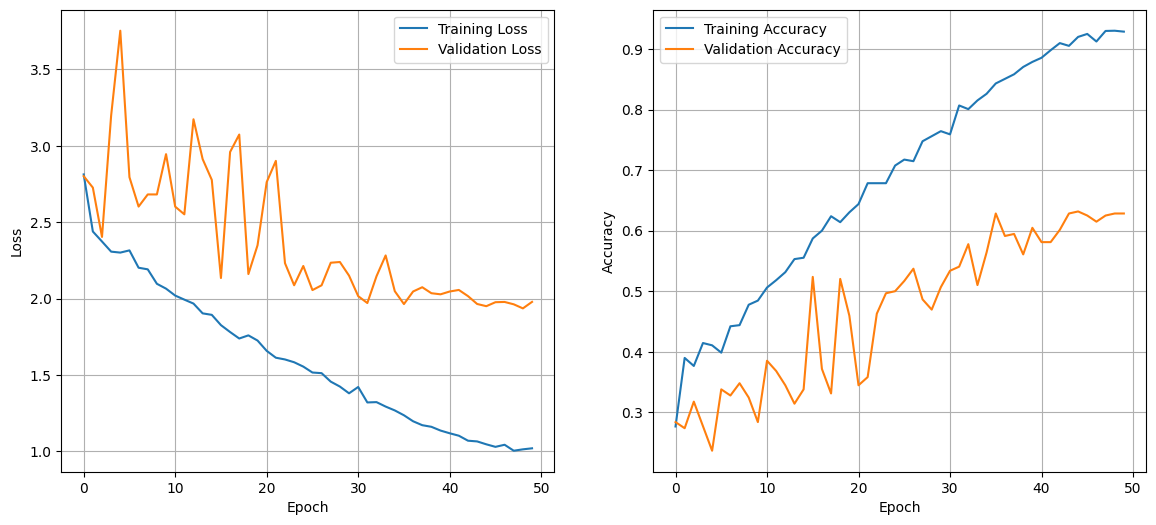

In [ ]:
# Evaluate Model
test_acc = evaluate(model=model_11, test_dl=test_dl, n_classes=N_CLASSES, train_losses=train_losses, val_losses=val_losses, train_accuracies=train_accuracies, val_accuracies=val_accuracies)

### At this point the increase of the complexity (around 7.6M parameters) and deepness of the model actually resulted in a **reduced performance** in the same amount of epochs.

### In order to address this issue I will first try to apply dropout to the layers to help with **generalization**.

In [ ]:
class ClassifierDropout(nn.Module):          # subclassing nn.Module
    def __init__(self, input_dim, n_classes, dropout=0.15):
        super().__init__()

        #Repetition of stages taking inspiration from VGG.
        #Adding BatchNorm for faster convergence and averaging out spatial dimensions.
        self.features_extractor = nn.Sequential(
            # Block 1
            nn.Conv2d(3, 64, kernel_size=3, padding=0),
            nn.BatchNorm2d(64),
            nn.Dropout(dropout),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=0),
            nn.BatchNorm2d(64),
            nn.Dropout(dropout),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 2
            nn.Conv2d(64, 128, kernel_size=3, padding=0),
            nn.BatchNorm2d(128),
            nn.Dropout(dropout),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=0),
            nn.BatchNorm2d(128),
            nn.Dropout(dropout),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 3
            nn.Conv2d(128, 256, kernel_size=3, padding=0),
            nn.BatchNorm2d(256),
            nn.Dropout(dropout),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=0),
            nn.BatchNorm2d(256),
            nn.Dropout(dropout),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=0),
            nn.BatchNorm2d(256),
            nn.Dropout(dropout),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 4
            nn.Conv2d(256, 512, kernel_size=3, padding=0),
            nn.BatchNorm2d(512),
            nn.Dropout(dropout),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=0),
            nn.BatchNorm2d(512),
            nn.Dropout(dropout),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=0),
            nn.BatchNorm2d(512),
            nn.Dropout(dropout),
            nn.ReLU(inplace=True)
        )

        # Global Average Pooling classifier averaging out Spatial Dimensions taking inspiration from Inception V1
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),     # Averages spatial dimensions
            nn.Flatten(),
            nn.Linear(512, n_classes)         # Outputs the class scores
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features_extractor(x)    # Pass input through the feature extractor
        x = self.classifier(x)
        return x

#### Looking at the previous loss trajectories, I decide to reduce the learning rate starting point.

In [ ]:
N_CLASSES = train_ds.get_num_classes()
INPUT_DIM = train_ds.__getitem__(0)[0].shape[0]
model_dropout = ClassifierDropout(
    INPUT_DIM,
    N_CLASSES
).to(device)


# using pytorch OneCycleLR
EPOCHS = 50
PATIENCE = None                                                                             # no early stopping
OPTIMIZER = torch.optim.Adam(model_dropout.parameters(), lr=0.001)                          # LOWERING starting lr, seeing previous loss graphs
SCHEDULER = OneCycleLR(OPTIMIZER, max_lr=0.001, total_steps=4150, final_div_factor=10000)   # from 1e-3 to 1e-7
CRITERION = nn.CrossEntropyLoss(label_smoothing = 0.1)                                      # label smoothing -> correct will be 0.9

results = train_loop(
    model_dropout,
    train_dl=train_dl,
    val_dl=val_dl,
    criterion=CRITERION,  # loss
    opt=OPTIMIZER,
    scheduler=SCHEDULER,
    epochs=EPOCHS,
    patience=PATIENCE,
    verbose=True          # print progress
)

best_val_acc, best_weights, best_epoch, train_losses, val_losses, train_accuracies, val_accuracies = results

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50, Training Loss: 2.9527 - Training Acc: 0.2595, Validation Loss: 3.8275 - Validation Acc: 0.1047
Epoch 5/50, Training Loss: 2.1022 - Training Acc: 0.4670, Validation Loss: 3.3330 - Validation Acc: 0.1250
Epoch 10/50, Training Loss: 1.8571 - Training Acc: 0.5621, Validation Loss: 2.9702 - Validation Acc: 0.2297
Epoch 15/50, Training Loss: 1.6519 - Training Acc: 0.6530, Validation Loss: 2.6253 - Validation Acc: 0.4155
Epoch 20/50, Training Loss: 1.4107 - Training Acc: 0.7572, Validation Loss: 2.4564 - Validation Acc: 0.4527
Epoch 25/50, Training Loss: 1.2737 - Training Acc: 0.8216, Validation Loss: 2.2784 - Validation Acc: 0.4764
Epoch 30/50, Training Loss: 1.1579 - Training Acc: 0.8633, Validation Loss: 2.2901 - Validation Acc: 0.4966
Epoch 35/50, Training Loss: 1.0524 - Training Acc: 0.9102, Validation Loss: 2.3801 - Validation Acc: 0.4764
Epoch 40/50, Training Loss: 0.9755 - Training Acc: 0.9356, Validation Loss: 2.1047 - Validation Acc: 0.5709
Epoch 45/50, Training Loss: 0.


Accuracy on Test Set: 0.6974


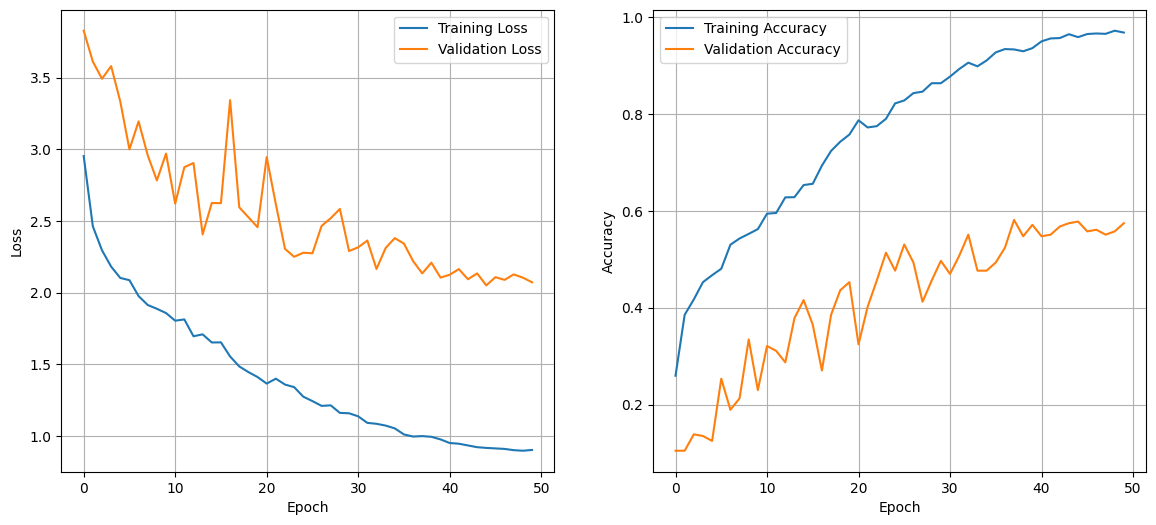

In [ ]:
# Evaluate Model
test_acc = evaluate(model=model_dropout, test_dl=test_dl, n_classes=N_CLASSES, train_losses=train_losses, val_losses=val_losses, train_accuracies=train_accuracies, val_accuracies=val_accuracies)

### Dropout actually **reduces** the performance of the model, and the low amount of training data probably isn't enough for the model to face overfitting problems.

### A solution to the bigger model having a lower score than the lower parameter model can be found in the introduction of the **residual connections**, in order to simplify the learning of the **identity** function for the model. Making sure that a deeper model is at least as good as a model with less parameters.

In [ ]:
# defining residual block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, strides=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, stride=strides)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

        # match dimension of skip connections to add it
        self.conv_skip = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=strides)

    def forward(self, x):
        residual = x
        # First convolution block,
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        # Second convolution block
        out = self.conv2(out)
        out = self.bn2(out)

        # adjust dimensions of skip connection
        residual = self.conv_skip(residual)

        # Add skip connection
        out += residual
        out = self.relu(out)
        return out

In [ ]:
# constructing net using residual block
class ResidualNN(nn.Module):
    def __init__(self, input_dim, n_classes, dropout=0.15):
        super().__init__()

        # Feature extractor with residual blocks
        self.features_extractor = nn.Sequential(
            # Block 1
            ResidualBlock(3, 64),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 2
            ResidualBlock(64, 128),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 3
            ResidualBlock(128, 256),
            ResidualBlock(256, 256),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 4
            ResidualBlock(256, 512),
            ResidualBlock(512, 512)
        )

        # Global Average Pooling classifier
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),     # Averages spatial dimensions
            nn.Flatten(),
            nn.Linear(512, n_classes)         # Outputs the class scores
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features_extractor(x)        # Pass input through the feature extractor
        x = self.classifier(x)                # Classifier stage
        return x

In [ ]:
N_CLASSES = train_ds.get_num_classes()
INPUT_DIM = train_ds.__getitem__(0)[0].shape[0]
model_res = ResidualNN(
    INPUT_DIM,
    N_CLASSES
).to(device)

total_params = sum(p.numel() for p in model_res.parameters() if p.requires_grad)
print(f"Total trainable PARAMETERS of the model: {total_params}")
print()


# using pytorch OneCycleLR
EPOCHS = 50
PATIENCE = None                                                                               # no early stopping
OPTIMIZER = torch.optim.Adam(model_res.parameters(), lr=0.001)                                # LOWERING starting lr, seeing previous loss graphs
SCHEDULER = OneCycleLR(OPTIMIZER, max_lr=0.001, total_steps=4150, final_div_factor=10000)     # from 1e-3 to 1e-7
CRITERION = nn.CrossEntropyLoss(label_smoothing = 0.1)                                        # label smoothing -> correct will be 0.9

results = train_loop(
    model_res,
    train_dl=train_dl,
    val_dl=val_dl,
    criterion=CRITERION,  # loss
    opt=OPTIMIZER,
    scheduler=SCHEDULER,
    epochs=EPOCHS,
    patience=PATIENCE,
    verbose=True          # print progress
)

best_val_acc, best_weights, best_epoch, train_losses, val_losses, train_accuracies, val_accuracies = results

Total trainable PARAMETERS of the model: 11115755



  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50, Training Loss: 2.6993 - Training Acc: 0.3462, Validation Loss: 2.5662 - Validation Acc: 0.3480
Epoch 5/50, Training Loss: 1.7974 - Training Acc: 0.5917, Validation Loss: 2.1693 - Validation Acc: 0.4764
Epoch 10/50, Training Loss: 1.5702 - Training Acc: 0.6962, Validation Loss: 2.3800 - Validation Acc: 0.4662
Epoch 15/50, Training Loss: 1.2798 - Training Acc: 0.8205, Validation Loss: 2.2801 - Validation Acc: 0.5236
Epoch 20/50, Training Loss: 1.1002 - Training Acc: 0.9057, Validation Loss: 2.1897 - Validation Acc: 0.5574
Epoch 25/50, Training Loss: 1.0110 - Training Acc: 0.9394, Validation Loss: 1.8207 - Validation Acc: 0.6723
Epoch 30/50, Training Loss: 0.9023 - Training Acc: 0.9708, Validation Loss: 1.8936 - Validation Acc: 0.6588
Epoch 35/50, Training Loss: 0.8472 - Training Acc: 0.9841, Validation Loss: 1.7752 - Validation Acc: 0.6588
Epoch 40/50, Training Loss: 0.8108 - Training Acc: 0.9909, Validation Loss: 1.6546 - Validation Acc: 0.6993
Epoch 45/50, Training Loss: 0.


Accuracy on Test Set: 0.7976


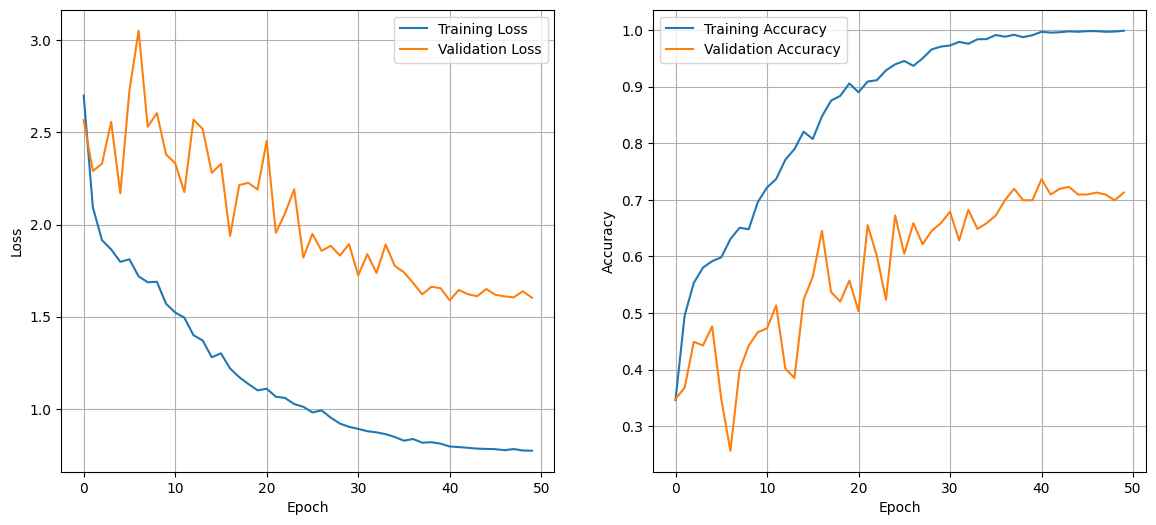

In [ ]:
# Evaluate Model
test_acc = evaluate(model=model_res, test_dl=test_dl, n_classes=N_CLASSES, train_losses=train_losses, val_losses=val_losses, train_accuracies=train_accuracies, val_accuracies=val_accuracies)

### As we can see the model surpasses the accuracy of the 1.7M parameters model, gainig a best accuracy on validation set of 0.7365 and 0.7976 on test set.

## **Ablation Study**: Batch Norm and Learning Rate Scheduler
I finally try to **remove** first Batch Norm and than the learning rate scheduler to show the usefulness for the **convergence** of the network.

### Removing Batch Norm

In [ ]:
# defining residual block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, strides=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, stride=strides)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

        # match dimension of skip connections to add it
        self.conv_skip = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=strides)

    def forward(self, x):
        residual = x
        # First convolution block, without batch norm
        out = self.conv1(x)
        #out = self.bn1(out)
        out = self.relu(out)

        # Second convolution block, without batch norm
        out = self.conv2(out)
        #out = self.bn2(out)

        # adjust dimensions of skip connection
        residual = self.conv_skip(residual)

        # Add skip connection
        out += residual
        out = self.relu(out)
        return out

In [ ]:
N_CLASSES = train_ds.get_num_classes()
INPUT_DIM = train_ds.__getitem__(0)[0].shape[0]
model_res_no_bn = ResidualNN(
    INPUT_DIM,
    N_CLASSES
).to(device)

total_params = sum(p.numel() for p in model_res_no_bn.parameters() if p.requires_grad)
print(f"Total trainable PARAMETERS of the model: {total_params}")
print()


# using pytorch OneCycleLR
EPOCHS = 50
PATIENCE = None                                                                               # no early stopping
OPTIMIZER = torch.optim.Adam(model_res_no_bn.parameters(), lr=0.001)
SCHEDULER = OneCycleLR(OPTIMIZER, max_lr=0.001, total_steps=4150, final_div_factor=10000)     # from 1e-3 to 1e-7
CRITERION = nn.CrossEntropyLoss(label_smoothing = 0.1)                                        # label smoothing -> correct will be 0.9

results = train_loop(
    model_res_no_bn,
    train_dl=train_dl,
    val_dl=val_dl,
    criterion=CRITERION,  # loss
    opt=OPTIMIZER,
    scheduler=SCHEDULER,
    epochs=EPOCHS,
    patience=PATIENCE,
    verbose=True          # print progress
)

best_val_acc, best_weights, best_epoch, train_losses, val_losses, train_accuracies, val_accuracies = results

Total trainable PARAMETERS of the model: 11115755



  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50, Training Loss: 3.5533 - Training Acc: 0.0996, Validation Loss: 3.5554 - Validation Acc: 0.0743
Epoch 5/50, Training Loss: 2.8861 - Training Acc: 0.2398, Validation Loss: 2.9830 - Validation Acc: 0.2365
Epoch 10/50, Training Loss: 2.4398 - Training Acc: 0.3826, Validation Loss: 2.9521 - Validation Acc: 0.2466
Epoch 15/50, Training Loss: 1.9621 - Training Acc: 0.5284, Validation Loss: 2.5874 - Validation Acc: 0.4088
Epoch 20/50, Training Loss: 1.5581 - Training Acc: 0.7057, Validation Loss: 2.0055 - Validation Acc: 0.5068
Epoch 25/50, Training Loss: 1.2861 - Training Acc: 0.8170, Validation Loss: 2.3045 - Validation Acc: 0.4899
Epoch 30/50, Training Loss: 1.0866 - Training Acc: 0.9061, Validation Loss: 2.1489 - Validation Acc: 0.5608
Epoch 35/50, Training Loss: 0.9578 - Training Acc: 0.9568, Validation Loss: 1.9653 - Validation Acc: 0.5946
Epoch 40/50, Training Loss: 0.8753 - Training Acc: 0.9784, Validation Loss: 2.0019 - Validation Acc: 0.6014
Epoch 45/50, Training Loss: 0.


Accuracy on Test Set: 0.7215


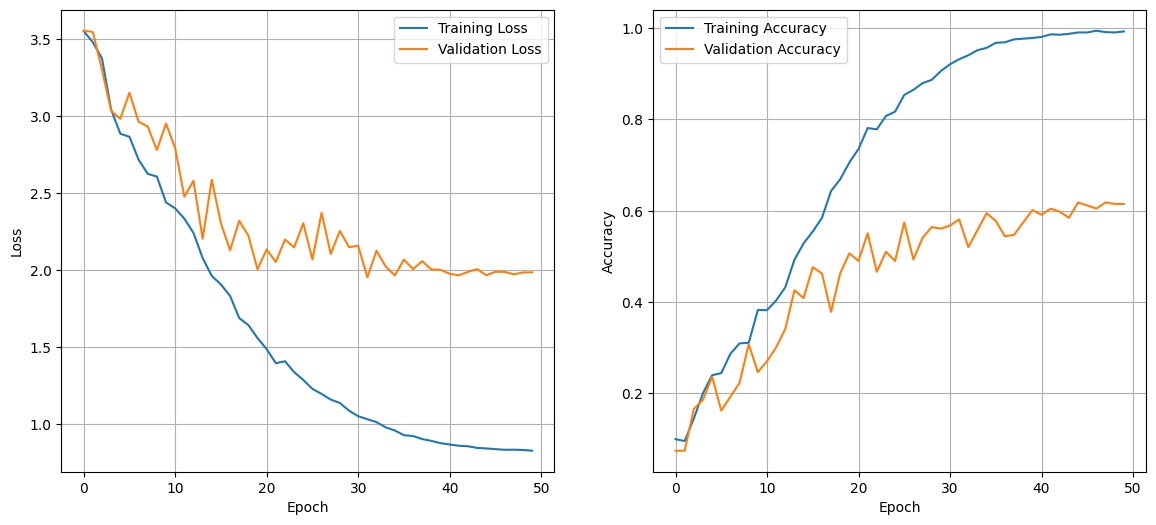

In [ ]:
# Evaluate Model
test_acc = evaluate(model=model_res_no_bn, test_dl=test_dl, n_classes=N_CLASSES, train_losses=train_losses, val_losses=val_losses, train_accuracies=train_accuracies, val_accuracies=val_accuracies)

### The validation accuracy is much lower than before. This shows how Batch Norm is a fundamental component to help the convergence of deeper networks.

### Now showing the effects of removing the Learning Rate Scheduler in the convergence of the NN.
### The model used is the best model so far with skip connections and Batch Norm.

Total trainable PARAMETERS of the model: 11115755



  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50, Training Loss: 2.8879 - Training Acc: 0.2636, Validation Loss: 2.9176 - Validation Acc: 0.2804
Epoch 5/50, Training Loss: 2.1093 - Training Acc: 0.4640, Validation Loss: 2.5866 - Validation Acc: 0.3784
Epoch 10/50, Training Loss: 1.6479 - Training Acc: 0.6682, Validation Loss: 2.3297 - Validation Acc: 0.4459
Epoch 15/50, Training Loss: 1.3585 - Training Acc: 0.7966, Validation Loss: 1.9993 - Validation Acc: 0.5709
Epoch 20/50, Training Loss: 1.2076 - Training Acc: 0.8610, Validation Loss: 1.9637 - Validation Acc: 0.6149
Epoch 25/50, Training Loss: 1.0827 - Training Acc: 0.9125, Validation Loss: 1.9577 - Validation Acc: 0.6385
Epoch 30/50, Training Loss: 1.0151 - Training Acc: 0.9292, Validation Loss: 1.9869 - Validation Acc: 0.6081
Epoch 35/50, Training Loss: 0.9272 - Training Acc: 0.9636, Validation Loss: 1.9410 - Validation Acc: 0.6419
Epoch 40/50, Training Loss: 0.8890 - Training Acc: 0.9739, Validation Loss: 1.8825 - Validation Acc: 0.6318
Epoch 45/50, Training Loss: 0.

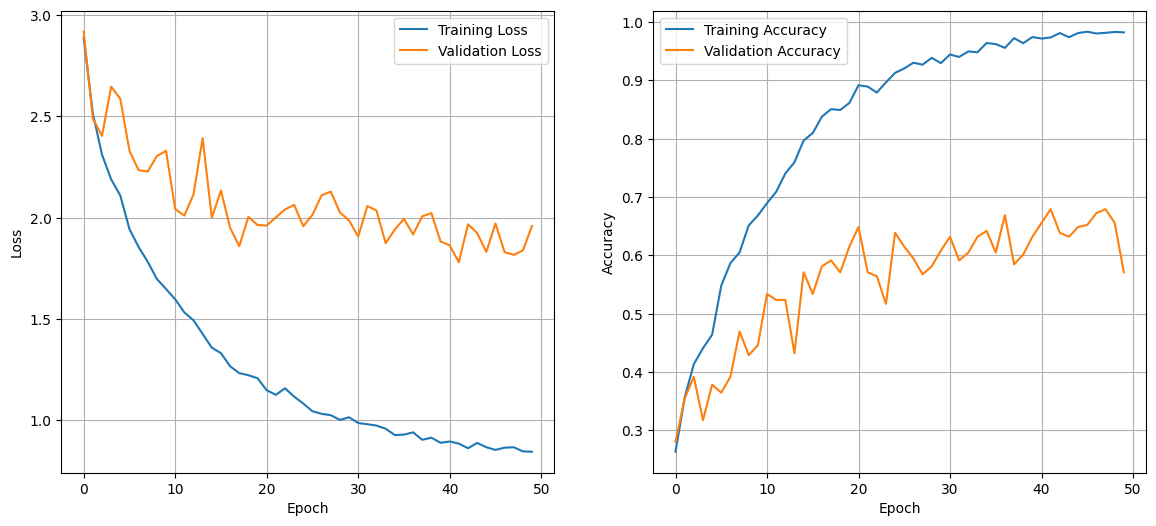

In [ ]:
N_CLASSES = train_ds.get_num_classes()
INPUT_DIM = train_ds.__getitem__(0)[0].shape[0]
model_res_no_sched = ResidualNN(
    INPUT_DIM,
    N_CLASSES
).to(device)

total_params = sum(p.numel() for p in model_res_no_sched.parameters() if p.requires_grad)
print(f"Total trainable PARAMETERS of the model: {total_params}")
print()


# REMOVING lr scheduler to show difference in convergence
EPOCHS = 50
PATIENCE = None                                                                               # no early stopping
OPTIMIZER = torch.optim.Adam(model_res_no_sched.parameters(), lr=0.001)
SCHEDULER = None
CRITERION = nn.CrossEntropyLoss(label_smoothing = 0.1)                                        # label smoothing -> correct will be 0.9

results = train_loop(
    model_res_no_sched,
    train_dl=train_dl,
    val_dl=val_dl,
    criterion=CRITERION,  # loss
    opt=OPTIMIZER,
    scheduler=SCHEDULER,
    epochs=EPOCHS,
    patience=PATIENCE,
    verbose=True          # print progress
)

best_val_acc, best_weights, best_epoch, train_losses, val_losses, train_accuracies, val_accuracies = results
# Evaluate Model
test_acc = evaluate(model=model_res_no_sched, test_dl=test_dl, n_classes=N_CLASSES, train_losses=train_losses, val_losses=val_losses, train_accuracies=train_accuracies, val_accuracies=val_accuracies)

### We showed how the LR is another fundamental hyperparameter. Reducing it at the end allows to reach lower optima.
 In particular the OneCycle approach start with low lr to exit out of random initialization of weights, rumps up to a higher lr for faster convergence and to avoid too narrow optimas at the beginning (reducing risk of overfitting) to finally decrese the lr again in order to descend to lower local optima.

# ACCURACY SUMMARY
| Model                          | Parameters   | Best Val Accuracy | Test Accuracy |
|--------------------------------|--------------|-------------------|---------------|
| First Model                    | 41 k          | **0.5676**        | 0.6133        |
| Second Model                   | 260 k         | **0.6520**        | 0.7392        |
| Third Model                    | 1.75 M        | **0.6892**        | 0.7698        |
| Fourth Model                   | 7.6 M         | **0.6318**        | 0.7320        |
| Fifth Model with Dropout       | 7.6 M         | **0.5811**        | 0.6974        |
| Sixth Model with Skip Connections | 11 M      | **0.7365**        | 0.7976        |
| Seventh Model (Skip Connections, No Batch Norm) | 11 M      | **0.6182**        | 0.7215        |
| Eighth Model (No LR Scheduler) | 11 M          | **0.6791**        | 0.7501        |

**Best Validation Accuracy Score: 0.7365**


## We showed how the **regular** design of **stages** is pretty effective at adding complexity to the network based on need and improving it's performance till it reaches the good level of compromise between complexity and accuracy.
## The **drawback** in an increase in **deepness** is the increase in hardness to train especially with low amount of data. **Skip connections** can address this issue.

# __PART 2__
### Using PRETRAINED model


In [ ]:
import torchvision.models as models

# import ResNet-18
resnet18 = models.resnet18(pretrained=True)

# freezing all layers and adding a new classifier to the NN
for param in resnet18.parameters():
    param.requires_grad = False

# replacing last layer and making sure it's unfrozen
N_CLASSES = train_ds.get_num_classes()
N_FTRS = resnet18.fc.in_features
resnet18.fc = nn.Linear(N_FTRS, N_CLASSES)
for param in resnet18.fc.parameters():
    param.requires_grad = True


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 29.9MB/s]


### First **freezing all the network layers but the newly added head layer**, keeping the **same** hyperparameters used before.

In [ ]:
N_CLASSES = train_ds.get_num_classes()
#INPUT_DIM = train_ds.__getitem__(0)[0].shape[0]
resnet18.to(device)

# using pytorch OneCycleLR
EPOCHS = 50
PATIENCE = None                                                                               # no early stopping
OPTIMIZER = torch.optim.Adam(resnet18.parameters(), lr=0.001)                                 # LOWERING starting lr, seeing previois loss graphs
SCHEDULER = OneCycleLR(OPTIMIZER, max_lr=0.001, total_steps=4150, final_div_factor=10000)     # from 1e-3 to 1e-7
CRITERION = nn.CrossEntropyLoss(label_smoothing = 0.1)                                        # label smoothing -> correct will be 0.9

results = train_loop(
    resnet18,
    train_dl=train_dl,
    val_dl=val_dl,
    criterion=CRITERION,  # loss
    opt=OPTIMIZER,
    scheduler=SCHEDULER,
    epochs=EPOCHS,
    patience=PATIENCE,
    verbose=True          # print progress
)


best_val_acc, best_weights, best_epoch, train_losses, val_losses, train_accuracies, val_accuracies = results

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50, Training Loss: 3.4519 - Training Acc: 0.1348, Validation Loss: 3.3597 - Validation Acc: 0.1689
Epoch 5/50, Training Loss: 2.3007 - Training Acc: 0.4943, Validation Loss: 2.3353 - Validation Acc: 0.4459
Epoch 10/50, Training Loss: 1.2741 - Training Acc: 0.8655, Validation Loss: 1.5458 - Validation Acc: 0.7196
Epoch 15/50, Training Loss: 1.0581 - Training Acc: 0.9292, Validation Loss: 1.3958 - Validation Acc: 0.7770
Epoch 20/50, Training Loss: 1.0053 - Training Acc: 0.9417, Validation Loss: 1.3388 - Validation Acc: 0.8041
Epoch 25/50, Training Loss: 0.9536 - Training Acc: 0.9633, Validation Loss: 1.3169 - Validation Acc: 0.8277
Epoch 30/50, Training Loss: 0.9301 - Training Acc: 0.9648, Validation Loss: 1.3370 - Validation Acc: 0.7939
Epoch 35/50, Training Loss: 0.9316 - Training Acc: 0.9708, Validation Loss: 1.3150 - Validation Acc: 0.8243
Epoch 40/50, Training Loss: 0.9047 - Training Acc: 0.9765, Validation Loss: 1.3051 - Validation Acc: 0.8378
Epoch 45/50, Training Loss: 0.


Accuracy on Test Set: 0.8427


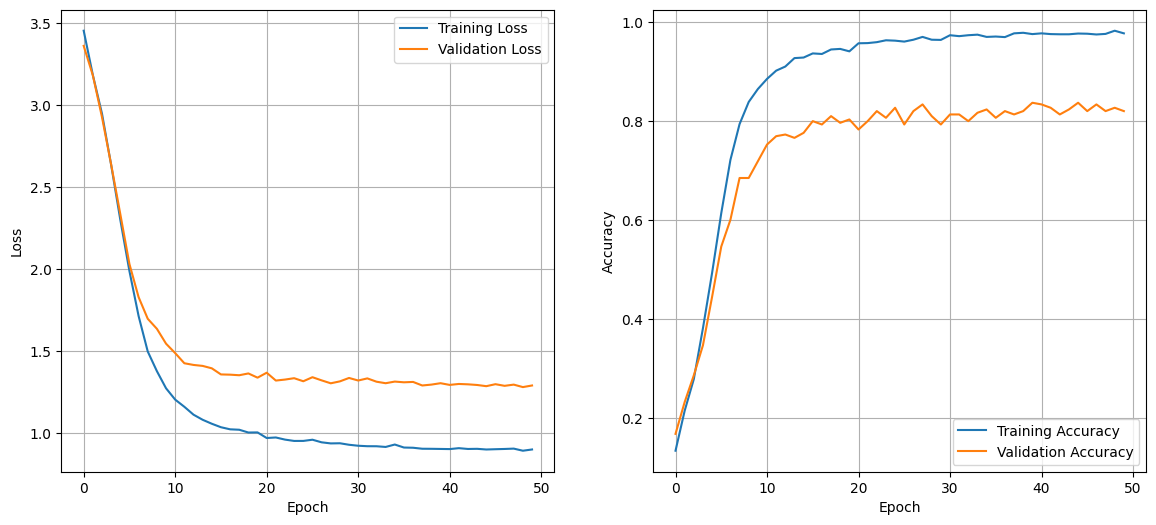

In [ ]:
# Evaluate Model
test_acc = evaluate(model=resnet18, test_dl=test_dl, n_classes=N_CLASSES, train_losses=train_losses, val_losses=val_losses, train_accuracies=train_accuracies, val_accuracies=val_accuracies)

### The model already achieves 0.8378 on the validation accuracy, training only the **head** of the fc classifier.
### Since the last features of the network though are hihly **specific** of the dataset they have been trained on, it has been chosen to further optimize the model, **unfreezing more layers**.

### Unfreezing all layers and using a **sliced learning rate**.
The idea was got from **Fast.ai library implementation** of transfer learning.

In [ ]:
from torchsummary import summary
summary(resnet18, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [ ]:
resnet18.load_state_dict(torch.load('/content/drive/MyDrive/AssignmentsIPCV/Weights/resnet_weights.pth'))

# unfreezing layers
for param in resnet18.parameters():
    param.requires_grad = True

# setting a sliced learning rate for the model -> last layers will train faster
OPTIMIZER = torch.optim.Adam([
    {'params': resnet18.layer4.parameters(), 'lr': 1e-5},   # Layer 4 targets the last block responsible of higher level and more abstract features
    {'params': resnet18.fc.parameters(), 'lr': 1e-4},       # Highest learning rate for the classifier layer
], lr=1e-12)                                                # Default lower learning rate for the rest


# using pytorch OneCycleLR
EPOCHS = 30
PATIENCE = None                                                                               # no early stopping
SCHEDULER = OneCycleLR(OPTIMIZER, max_lr=0.0001, total_steps=2500, final_div_factor=10000)     # from 1e-3 to 1e-7
CRITERION = nn.CrossEntropyLoss(label_smoothing = 0.1)                                        # label smoothing -> correct will be 0.9

results = train_loop(
    resnet18,
    train_dl=train_dl,
    val_dl=val_dl,
    criterion=CRITERION,  # loss
    opt=OPTIMIZER,
    scheduler=SCHEDULER,
    epochs=EPOCHS,
    patience=PATIENCE,
    verbose=True          # print progress
)

best_val_acc, best_weights, best_epoch, train_losses, val_losses, train_accuracies, val_accuracies = results

<ipython-input-35-6846ab4ef23d>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet18.load_state_dict(torch.load('/content/drive/MyDrive/AssignmentsIPCV/Weights/resnet_w

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/30, Training Loss: 0.9037 - Training Acc: 0.9769, Validation Loss: 1.3182 - Validation Acc: 0.8209
Epoch 5/30, Training Loss: 0.8555 - Training Acc: 0.9883, Validation Loss: 1.2509 - Validation Acc: 0.8615
Epoch 10/30, Training Loss: 0.7916 - Training Acc: 0.9973, Validation Loss: 1.2656 - Validation Acc: 0.8412
Epoch 15/30, Training Loss: 0.7581 - Training Acc: 0.9992, Validation Loss: 1.1881 - Validation Acc: 0.8919
Epoch 20/30, Training Loss: 0.7439 - Training Acc: 1.0000, Validation Loss: 1.2199 - Validation Acc: 0.8750
Epoch 25/30, Training Loss: 0.7321 - Training Acc: 1.0000, Validation Loss: 1.2252 - Validation Acc: 0.8851
Epoch 30/30, Training Loss: 0.7305 - Training Acc: 0.9996, Validation Loss: 1.2225 - Validation Acc: 0.8919

Best validation accuracy: 0.8919 at epoch 15



Accuracy on Test Set: 0.8958


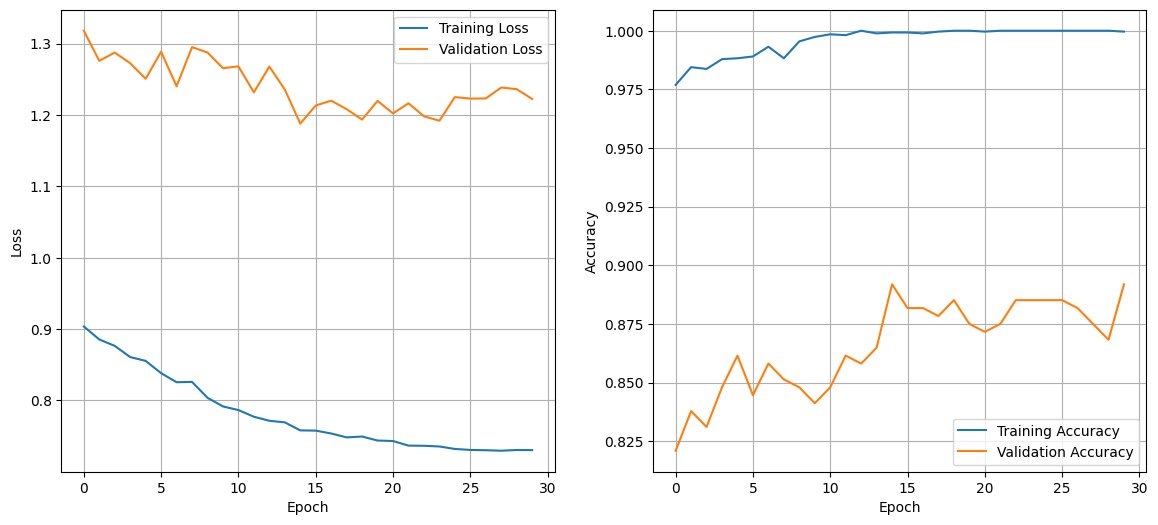

In [ ]:
# Evaluate Model
test_acc = evaluate(model=resnet18, test_dl=test_dl, n_classes=N_CLASSES, train_losses=train_losses, val_losses=val_losses, train_accuracies=train_accuracies, val_accuracies=val_accuracies)

### Unfreezing the layers and fine tuning especially the last ones responsible of hihger level features, gets the model to a best_val_acc of **0.8919** and test_acc of **0.8958**

#### Visualizing some **predictions**

In [ ]:
def visualize_predictions(model, test_dl):
    # Set the model to evaluation mode
    model.eval()

    dataset = test_dl.dataset
    indices = np.random.choice(len(dataset), size=10, replace=False)
    imgs = torch.stack([dataset[i][0] for i in indices]).to(device)
    labels = torch.tensor([dataset[i][1] for i in indices]).to(device)

    plt.figure(figsize=(18, 12))
    for i in range(10):

      # Make predictions
      with torch.no_grad():
          output = model(imgs[i].unsqueeze(0)) # adding batch dim
          pred = torch.argmax(output, 1)

      # Plotting the image and prediction
      plt.subplot(2, 5, i+1)
      plt.imshow(imgs[i].cpu().permute(1, 2, 0))
      plt.title(f"Prediction: {pred.item()}, Label: {labels[i].item()}")

    plt.show()

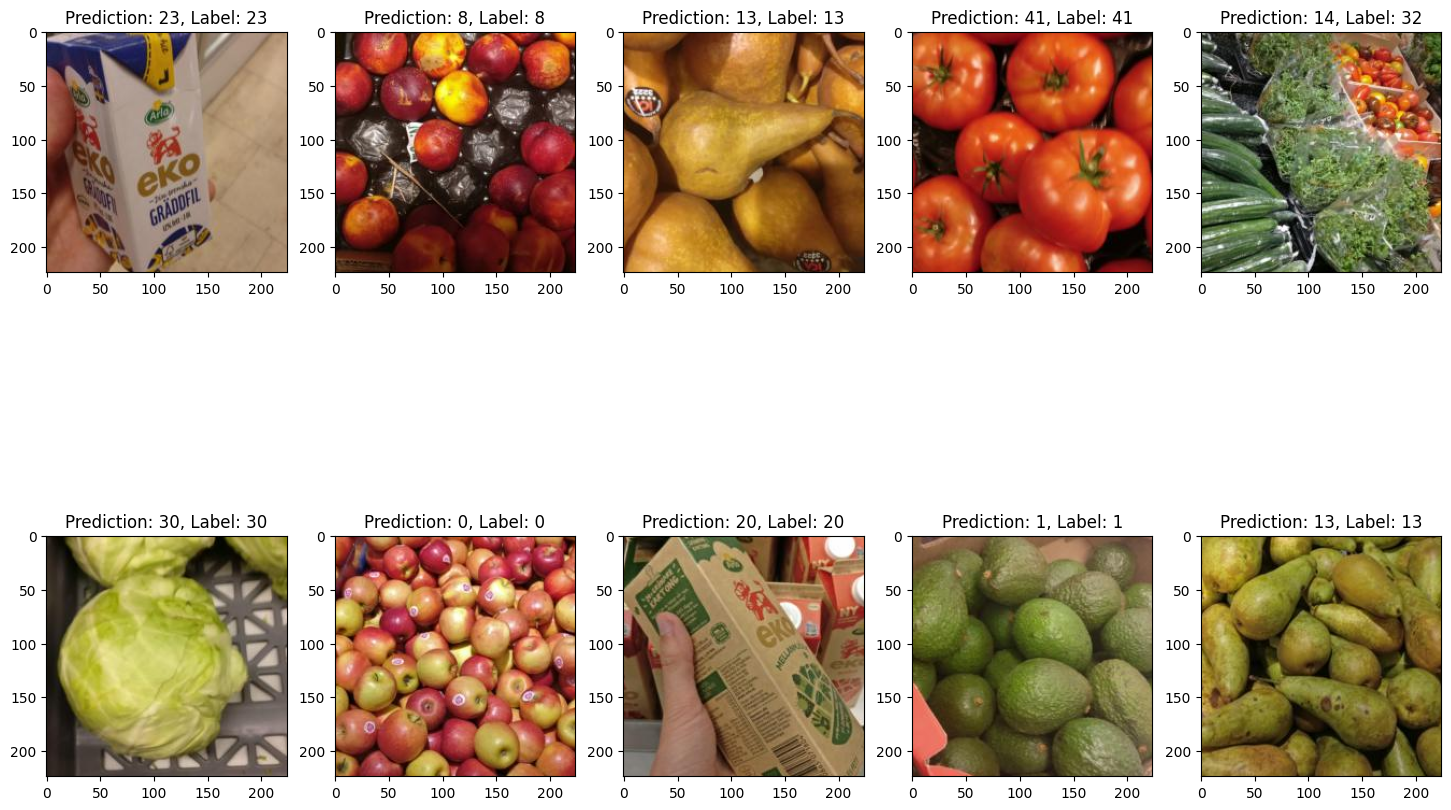

In [ ]:
visualize_predictions(resnet18, test_dl)